<a href="https://colab.research.google.com/github/QWX1027/GEOG5990M/blob/main/201907781_crime_deprivation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Investigating the Relationship Between Deprivation and Crime in Leeds

##1. Project Overview
This project investigates whether socio-economic deprivation is associated with higher crime rates across neighbourhoods in Leeds, UK. Leeds is a large metropolitan city with significant social and spatial inequalities, making it a suitable case study for exploring urban crime dynamics.

Prior research indicates that crime rates are often elevated in deprived areas, but this relationship is not always linear or consistent (Bannister & Fyfe, 2001; Wheeler & Steenbeek, 2021). By integrating open spatial datasets, this project examines how deprivation and crime co-vary at the Lower Layer Super Output Area (LSOA) level, combining statistical and visual methods.

**Research Question**:  
> Do more socio-economically deprived areas in Leeds report higher crime counts?

The aim is not only to assess correlation but also to visualise spatial patterns that may inform urban policy and place-based interventions.

## 2. Data Sources


This project uses three open-access datasets:

1. **Crime Data (March 2025)**
**File original name**: `2025-03-west-yorkshire-street.csv`

Sourced from the [UK Police Data Portal](https://data.police.uk/data/).
This dataset contains individual crime incidents reported to West Yorkshire Police, including crime type, coordinates, and the corresponding LSOA code. Records were filtered to include only Leeds.

2. **Indices of Multiple Deprivation (IMD) 2019**
**File original name**:
`File_7_-_All_IoD2019_Scores__Ranks__Deciles_and_Population_Denominators_3.xlsx`

Downloaded from:
[https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019](https://www.gov.uk/government/statistics/english-indices-of-deprivation-2019)
This file includes IMD scores and deciles for all English LSOAs and was filtered to include only Leeds for further processing.

3. **LSOA Boundaries (2011)**
**File original name**: Lower_layer_Super_Output_Areas_(December_2011)_Boundaries_EW BFC (V3)
Downloaded from:
https://geoportal.statistics.gov.uk/datasets/357ee15b1080431491bf965394090c72_0/explore?location=52.723881%2C-2.489527%2C7.47

The shapefile contains polygon geometries and metadata for all LSOAs in Leeds based on 2011 Census definitions. This dataset will be used for spatial joins and map visualisation.

## 3. Loading the Datasets

All files are stored on Google Drive.

In [13]:
# Mount Google Drive to access project files
from google.colab import drive
drive.mount('/content/drive')

# Import essential libraries for data analysis and visualisation:
import pandas as pd            # For handling tabular (non-spatial) data
import geopandas as gpd          # For handling geospatial vector data (shapefiles, spatial joins)
import matplotlib.pyplot as plt      # For generating static plots and figures
import seaborn as sns           # For statistical data visualisation (e.g. histograms, boxplots)


# Define the base path to the project folder in Google Drive
# This helps simplify file path references throughout the notebook
base_path = '/content/drive/MyDrive/GEOG5990M_Project/'

# Load IMD deprivation data (previously filtered to include only Leeds LSOAs in Excel)
imd = pd.read_csv(base_path + 'leeds_imd_2019.csv')

# Load crime data (March 2025) including individual incidents and their assigned LSOA codes
crime = pd.read_csv(base_path + 'leeds_crime_March2025.csv')

# Load the LSOA 2011 boundary shapefile for Leeds (used for spatial join and mapping)
lsoa = gpd.read_file(base_path + 'Leeds_LSOA_2011/leeds_LSOA_2011.shp')

# Display the first few rows of each dataset to verify successful loading
print("IMD data:")
display(imd.head())

print("Crime data:")
display(crime.head())

print("LSOA shapefile:")
display(lsoa.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
IMD data:


,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01011264,Leeds 011A,E08000035,Leeds,20.525,13915,5,0.088,18238,6,...,5201,2,0.054,14415,5,1252,188,653,411,665
1,E01011265,Leeds 009A,E08000035,Leeds,13.602,20368,7,0.080,19551,6,...,4494,2,-0.114,17248,6,1788,321,999,468,1007
2,E01011266,Leeds 008A,E08000035,Leeds,5.808,29666,10,0.021,32142,10,...,10528,4,-0.194,18531,6,2381,483,1431,467,1444
3,E01011267,Leeds 009B,E08000035,Leeds,27.863,9111,3,0.153,10261,4,...,6552,2,-0.100,16979,6,1489,316,780,393,783
4,E01011268,Leeds 010A,E08000035,Leeds,34.444,6082,2,0.161,9579,3,...,3716,2,0.078,14035,5,1358,270,823,265,824


Crime data:


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,9897fc02526c7bcf47e179dee300f292b2635c36415c81...,25-Mar,West Yorkshire Police,West Yorkshire Police,-1.391465,53.941177,On or near Dove Close,E01011698,Leeds 001A,Public order,Unable to prosecute suspect,NaN
1,dfb0d294f5b2246ea6eb726654f21086ad7f4313aebebb...,25-Mar,West Yorkshire Police,West Yorkshire Police,-1.391465,53.941177,On or near Dove Close,E01011698,Leeds 001A,Public order,Investigation complete; no suspect identified,NaN
2,e5844452b15c1f2cc607ac4c1a75c03f5288135591df40...,25-Mar,West Yorkshire Police,West Yorkshire Police,-1.391358,53.938031,On or near Supermarket,E01011698,Leeds 001A,Shoplifting,Under investigation,NaN
3,2a2820b7aee30671de0007bf110b19eb729c8652357bd6...,25-Mar,West Yorkshire Police,West Yorkshire Police,-1.391358,53.938031,On or near Supermarket,E01011698,Leeds 001A,Shoplifting,Investigation complete; no suspect identified,NaN
4,6cd24675effa4eca3249edbb1369171c411966faf97163...,25-Mar,West Yorkshire Police,West Yorkshire Police,-1.392535,53.939861,On or near Foss Avenue,E01011698,Leeds 001A,Vehicle crime,Investigation complete; no suspect identified,NaN


LSOA shapefile:


,LSOA11CD,LSOA11NM,geometry
0,E01032504,Leeds 007F,"POLYGON ((426573.188 441718.812, 426573.11 441..."
1,E01032502,Leeds 017F,"POLYGON ((424841.601 438532.716, 424839.377 43..."
2,E01032503,Leeds 007E,"POLYGON ((424881 443639, 424880.655 443637.105..."
3,E01032500,Leeds 067H,"POLYGON ((426585 433610, 426569 433607, 426567..."
4,E01032501,Leeds 017E,"POLYGON ((424473.001 439078, 424452.008 439066..."


## 4. Data Exploration

This section conducts exploratory data analysis to better understand the structure, distribution, and suitability of key variables before further modelling and visualisation.

### 4.1 Structural Checks

Before analysis, several steps are taken:

- **Column names** of all three datasets are printed to identify available variables.
- **Data types and structure** are reviewed to confirm the nature of each column (e.g. object, float).
- **Missing values** are summarised to determine whether any cleaning or imputation is needed.
- **Spatial metadata** is checked for the shapefile to confirm that a valid Coordinate Reference System is present and suitable for spatial operations.

These steps ensure that the datasets are structurally compatible and ready for merging and further analysis.

In [14]:
# Show column names for all datasets
print("📄 IMD dataset columns:")
for col in imd.columns:
    print("-", col)

print("\n📄 Crime dataset columns:")
for col in crime.columns:
    print("-", col)

print("\n📄 LSOA shapefile columns:")
for col in lsoa.columns:
    print("-", col)

# Show dataset structure and types
print("\n🔍 IMD dataset info:")
imd.info()

print("\n🔍 Crime dataset info:")
crime.info()

print("\n🔍 LSOA shapefile info:")
lsoa.info()

# Check for missing values
print("\n🧼 Missing values in IMD dataset:")
print(imd.isna().sum())

print("\n🧼 Missing values in crime dataset:")
print(crime.isna().sum())

# Check spatial reference system for LSOA shapefile
print("\n🗺️ Coordinate Reference System (CRS) of the LSOA shapefile:")
print(lsoa.crs)


📄 IMD dataset columns:
- LSOA code (2011)
- LSOA name (2011)
- Local Authority District code (2019)
- Local Authority District name (2019)
- Index of Multiple Deprivation (IMD) Score
- Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)
- Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)
- Income Score (rate)
- Income Rank (where 1 is most deprived)
- Income Decile (where 1 is most deprived 10% of LSOAs)
- Employment Score (rate)
- Employment Rank (where 1 is most deprived)
- Employment Decile (where 1 is most deprived 10% of LSOAs)
- Education, Skills and Training Score
- Education, Skills and Training Rank (where 1 is most deprived)
- Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)
- Health Deprivation and Disability Score
- Health Deprivation and Disability Rank (where 1 is most deprived)
- Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)
- Crime Score
- Crime Rank (where 1

### 4.2 Variable Selection and Justification

Based on the structure and content of the datasets, two key variables are selected for analysis:

- **Index of Multiple Deprivation (IMD) Score**  
  *Field: `Index of Multiple Deprivation (IMD) Score`*  
  It is the UK government’s standard metric for assessing small-area deprivation and is widely used in both academic and policy contexts (Ministry of Housing, Communities & Local Government, 2019). While alternative deprivation domains (e.g., income or housing) were considered, the overall IMD Score was preferred due to its comprehensive nature and its use in national deprivation assessments.

- **Crime Count**  
  *Derived from: `LSOA code` in the crime dataset*  
  Since each row in the crime dataset represents an individual incident, records are aggregated by `LSOA code` to produce a `Crime_Count` variable.  
  This is a standard practice in spatial crime research to compare crime intensity across administrative neighbourhoods (Wheeler & Steenbeek, 2021).



## 5. Data Pre-processing

This section performs the required data cleaning and transformation steps based on the issues identified during exploratory analysis:

- **Missing values**:  
While some crime entries lack a `Crime ID` or `Last outcome category`, all has valid `LSOA codes`.
These missing fields are retained as they do not affect spatial aggregation (Goodchild, 2010; Brunsdon & Comber, 2018).

- **Column name inconsistency**:  
LSOA code columns are renamed to a unified `LSOA11CD` across datasets to enable merging.

- **Different data structures**:  
The IMD and shapefile data are at LSOA level, whereas the crime dataset is at the individual incident level. Aggregation is required to produce a `Crime_Count` per LSOA.

### 5.1 Standardising column names for merging

To ensure successful merging, `LSOA code (2011)` (IMD) and `LSOA code` (crime) are both renamed to `LSOA11CD`, which helps with the compatibility for spatial joins and tabular merges.

In [15]:
# Standardise the LSOA code column in IMD dataset
imd.rename(columns={'LSOA code (2011)': 'LSOA11CD'}, inplace=True)

# Standardise the LSOA code column in crime dataset
crime.rename(columns={'LSOA code': 'LSOA11CD'}, inplace=True)

# Confirm column name change
print("✅ IMD LSOA column:", 'LSOA11CD' in imd.columns)
print("✅ Crime LSOA column:", 'LSOA11CD' in crime.columns)


✅ IMD LSOA column: True
✅ Crime LSOA column: True


### 5.2 Creating `Crime_Count`

Crime incidents are grouped by `LSOA11CD` to calculate total `Crime_Counts`.


In [16]:
# Group crime records by LSOA code and count number of incidents
crime_counts = crime.groupby('LSOA11CD').size().reset_index(name='Crime_Count')

# Preview the first 10 rows of the aggregated crime counts
print("🔹 First 10 rows of crime_counts:")
display(crime_counts.head(10))

# Preview the last 10 rows of the aggregated crime counts
print("\n🔹 Last 10 rows of crime_counts:")
display(crime_counts.tail(10))

# Check overall structure of the crime_counts dataframe
print("\n📋 Structure of crime_counts:")
crime_counts.info()


🔹 First 10 rows of crime_counts:


,LSOA11CD,Crime_Count
0,E01011264,4
1,E01011265,39
2,E01011266,25
3,E01011267,20
4,E01011268,13
5,E01011269,11
6,E01011270,7
7,E01011271,3
8,E01011272,4
9,E01011273,25



🔹 Last 10 rows of crime_counts:


,LSOA11CD,Crime_Count
472,E01035045,2
473,E01035046,6
474,E01035047,20
475,E01035048,53
476,E01035049,7
477,E01035050,12
478,E01035051,7
479,E01035052,12
480,E01035053,10
481,E01035054,26



📋 Structure of crime_counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LSOA11CD     482 non-null    object
 1   Crime_Count  482 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.7+ KB


The resulting table of `crime_counts` contains 482 rows—matching both the IMD and shapefile datasets, confirming structural alignment.

### 5.3 Visualising and Validating **Crime_Count** and **IMD_Score** Distributions

Before merging and modelling, the two key variables — `Crime_Count` and `IMD_Score` — are visualised to assess their distributions, identify potential outliers, and confirm whether any transformation or removal is required.


#### 5.3.1 Histogram Display

Histograms are used to visualise the distribution of Crime_Count and IMD_Score, as they are suitable for showing skewness and frequency and are preferred over bar plots to better capture the continuous distribution and skewness of the variables.

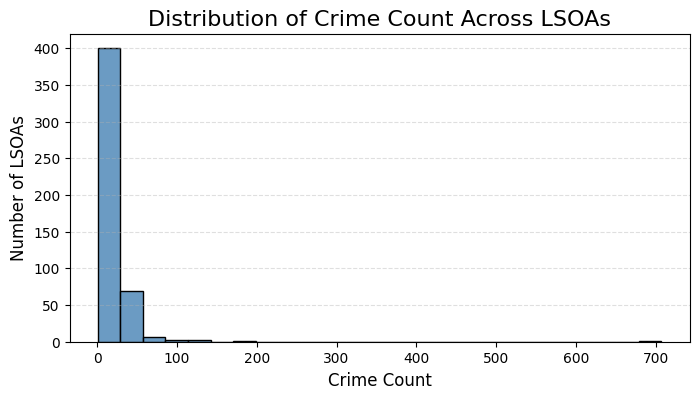

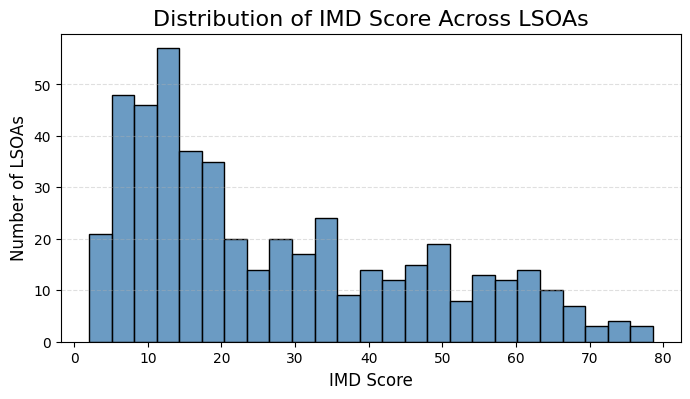

In [17]:
# Histogram of Crime Count
plt.figure(figsize=(8, 4))
sns.histplot(
    crime_counts['Crime_Count'],
    bins=25,
    color='steelblue',
    alpha=0.8,
    edgecolor='black'
)
plt.title('Distribution of Crime Count Across LSOAs', fontsize=16)
plt.xlabel('Crime Count', fontsize=12)
plt.ylabel('Number of LSOAs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Histogram of IMD Score
plt.figure(figsize=(8, 4))
sns.histplot(
    imd['Index of Multiple Deprivation (IMD) Score'],
    bins=25,
    color='steelblue',
    alpha=0.8,
    edgecolor='black'
)
plt.title('Distribution of IMD Score Across LSOAs', fontsize=16)
plt.xlabel('IMD Score', fontsize=12)
plt.ylabel('Number of LSOAs', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

- `Crime_Count` exhibited strong right skewness with several high outliers.  
- `IMD Score` was more symmetrically distributed but varied significantly between areas.  
These results supported the use of quantile-based classification for spatial visualisation and the appropriateness of linear modelling.

#### 5.3.2 Boxplot Display
Boxplots are added to complement histograms, providing clearer insight into potential outliers.

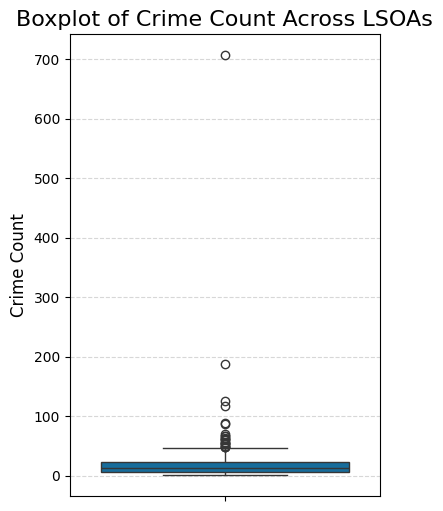

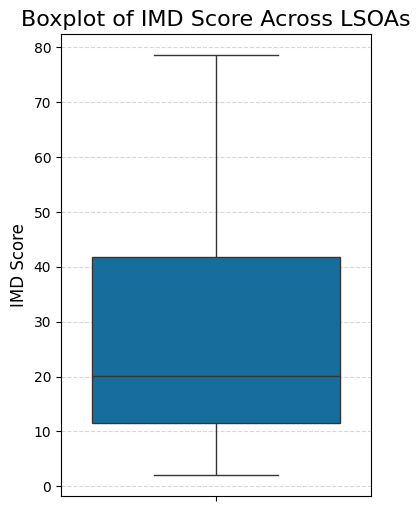

In [18]:
# Set colour-blind friendly style
sns.set_palette("colorblind")

# Vertical Boxplot of Crime Count
plt.figure(figsize=(4, 6))
sns.boxplot(y=crime_counts['Crime_Count'])
plt.title('Boxplot of Crime Count Across LSOAs', fontsize=16)
plt.ylabel('Crime Count', fontsize=12)
plt.xlabel('')  # no x-axis label for a single-variable boxplot
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

# Vertical Boxplot of IMD Score
plt.figure(figsize=(4, 6))
sns.boxplot(y=imd['Index of Multiple Deprivation (IMD) Score'])
plt.title('Boxplot of IMD Score Across LSOAs', fontsize=16)
plt.ylabel('IMD Score', fontsize=12)
plt.xlabel('')  # no x-axis label for a single-variable boxplot
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

Boxplots confirm these distribution patterns and highlight several high-value outliers in `Crime_Count`,  which may influence model selection and require attention in later analysis.

### 5.4 Merging IMD data with aggregated crime counts

Now that the `Crime_Count` variable has been generated and the column names standardised, the IMD and crime datasets can be merged on their shared LSOA code (`LSOA11CD`).


In [19]:
# Merge the IMD and crime_counts tables on the LSOA11CD column
# A left join is used to retain all LSOAs from the IMD dataset
combined = pd.merge(imd, crime_counts, on='LSOA11CD', how='left')

# Preview the merged dataframe
print("✅ Merged dataframe preview:")
display(combined.head())

# Check for any missing values after merge
print("\n🧼 Missing values in merged dataset:")
print(combined.isna().sum())


✅ Merged dataframe preview:


,LSOA11CD,LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),Crime_Count
0,E01011264,Leeds 011A,E08000035,Leeds,20.525,13915,5,0.088,18238,6,...,2,0.054,14415,5,1252,188,653,411,665,4.0
1,E01011265,Leeds 009A,E08000035,Leeds,13.602,20368,7,0.080,19551,6,...,2,-0.114,17248,6,1788,321,999,468,1007,39.0
2,E01011266,Leeds 008A,E08000035,Leeds,5.808,29666,10,0.021,32142,10,...,4,-0.194,18531,6,2381,483,1431,467,1444,25.0
3,E01011267,Leeds 009B,E08000035,Leeds,27.863,9111,3,0.153,10261,4,...,2,-0.100,16979,6,1489,316,780,393,783,20.0
4,E01011268,Leeds 010A,E08000035,Leeds,34.444,6082,2,0.161,9579,3,...,2,0.078,14035,5,1358,270,823,265,824,13.0



🧼 Missing values in merged dataset:
LSOA11CD                                                                                               0
LSOA name (2011)                                                                                       0
Local Authority District code (2019)                                                                   0
Local Authority District name (2019)                                                                   0
Index of Multiple Deprivation (IMD) Score                                                              0
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                                    0
Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)                     0
Income Score (rate)                                                                                    0
Income Rank (where 1 is most deprived)                                                                 0
Income Decile (whe

After merging, 15 LSOAs have missing `Crime_Count` values, indicating no crimes were reported in those areas during the selected period.

To preserve spatial completeness and avoid discarding valid zero-crime zones, these NaNs are replaced with `0`.


In [20]:
# Replace NaN in Crime_Count with 0 (meaning no crime reported)
combined['Crime_Count'] = combined['Crime_Count'].fillna(0).astype(int)

# Confirm no missing values remain
print("✅ Missing values in Crime_Count after filling:", combined['Crime_Count'].isna().sum())


✅ Missing values in Crime_Count after filling: 0


## 6. Exploring the Relationship Between Deprivation and Crime

This section visualises and quantifies the relationship between **IMD Score** and **Crime_Count** across Leeds.

### 6.1 Scatterplot and Correlation

Both `Crime_Count` and `IMD Score` are continuous variables, making scatterplots with a fitted regression line an appropriate way to visualise their relationship. This method preserves the full range of values and allows detection of trends, outliers, and potential linearity. A regression line with 95% confidence intervals was included to support interpretability (Wickham, 2016).

To quantify the relationship, a simple linear regression model was applied using the Ordinary Least Squares (OLS) method. This approach was chosen for its simplicity, transparency, and suitability for continuous variable analysis. Compared to more complex alternatives (e.g., multivariate or spatial models), OLS provides an accessible baseline model for communicating associations to non-technical audiences such as policymakers.

In addition to visual insight, the regression provides interpretable coefficients—including slope, intercept, and R²—and complements the Pearson correlation coefficient by offering a predictive framework. This step bridges visual exploration and statistical inference.


In [21]:
# Drop any row where IMD Score or Crime Count is missing
# (This is a precaution; missing values have been handled earlier)
filtered = combined.dropna(subset=['Index of Multiple Deprivation (IMD) Score', 'Crime_Count'])

# Extract variables for analysis
X = filtered['Index of Multiple Deprivation (IMD) Score']
y = filtered['Crime_Count']

# Confirm no missing values remain
print(filtered.isna().sum())


LSOA11CD                                                                                              0
LSOA name (2011)                                                                                      0
Local Authority District code (2019)                                                                  0
Local Authority District name (2019)                                                                  0
Index of Multiple Deprivation (IMD) Score                                                             0
Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)                                   0
Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)                    0
Income Score (rate)                                                                                   0
Income Rank (where 1 is most deprived)                                                                0
Income Decile (where 1 is most deprived 10% of LSOAs)           

<ipython-input-22-f2ba1bd6ddce>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
<ipython-input-22-f2ba1bd6ddce>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]


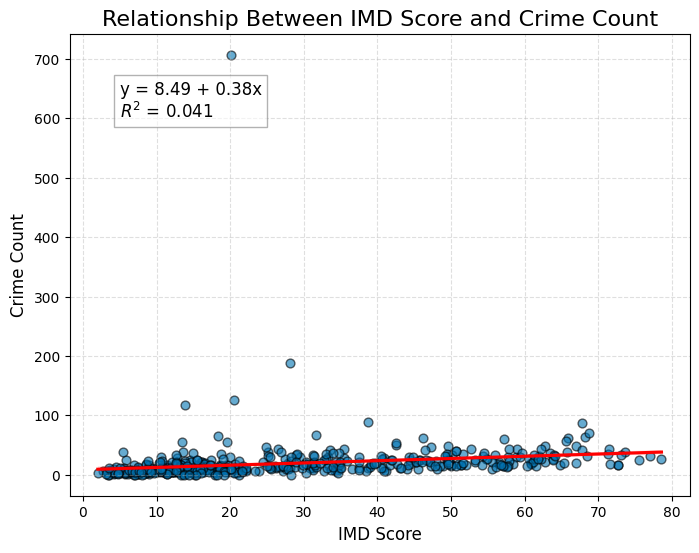

Pearson correlation coefficient: 0.204, p-value: 0.00001


In [22]:
# AI support acknowledgement:
# Prompt: “I would like to explore the relationship between two continuous variables using Pearson correlation and a regression model. Which Python libraries should I use, and could you provide a simple example with explanations that I can apply to my own project?”
# Tool: ChatGPT-4.0 (OpenAI, https://chat.openai.com/)
# The code below was adapted by the author based on the example provided.


# Import the pearsonr function from the scipy.stats module
# This function calculates the Pearson correlation coefficient (r)
# and associated p-value to test for linear correlation
from scipy.stats import pearsonr

# Import statsmodels for fitting a linear regression model (to extract R² and equation)
import statsmodels.api as sm

# Set a colour-blind friendly palette for accessibility
sns.set_palette("colorblind")

# Fit linear regression model using statsmodels
X = combined['Index of Multiple Deprivation (IMD) Score']
y = combined['Crime_Count']
X_with_const = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X_with_const).fit()

# Extract coefficients for plotting
intercept = model.params[0]
slope = model.params[1]
r_squared = model.rsquared

# Create scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(
    x=X,
    y=y,
    scatter_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'black', 'marker':'o'},
    line_kws={'color': 'red'}
)
plt.title('Relationship Between IMD Score and Crime Count', fontsize=16)
plt.xlabel('IMD Score', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

# Annotate regression line equation and R² on the plot
plt.text(
    5, y.max() * 0.85,
    f'y = {intercept:.2f} + {slope:.2f}x\n$R^2$ = {r_squared:.3f}',
    fontsize=12,
    bbox=dict(facecolor='white', edgecolor='grey', alpha=0.6)
)

plt.show()

# Calculate and print Pearson correlation coefficient
r, p = pearsonr(X, y)
print(f"Pearson correlation coefficient: {r:.3f}, p-value: {p:.5f}")


### 6.2 Relationship Interpretation

The fitted linear regression model reveals a statistically significant but weak relationship between deprivation and crime. The Pearson correlation coefficient is **r = 0.204** (p < 0.001), indicating a low positive association. The regression equation, **y = 8.49 + 0.38x**, suggests that each unit increase in IMD Score is associated with an average increase of 0.38 in crime count.

However, the model's **R² value of 0.041** indicates that deprivation alone explains just 4.1% of the variation in crime levels, suggesting that it is not a strong standalone predictor in this context.

While the association supports the hypothesis that more deprived areas tend to experience higher crime, the limited explanatory power implies that other contextual factors—such as demographics, policing, or urban form—may play a more substantial role.

These findings highlight the usefulness of simple linear models for initial diagnosis, while also pointing to the need for more advanced multivariate or spatial approaches to capture the complexity of urban crime patterns.


## 7. Spatial Visualisation

Mapping these variables reveals their geographic distribution and allows comparison between deprivation and crime levels across Leeds LSOAs.

Spatial visualisation provides an intuitive understanding of where the most deprived or high-crime areas are located, complementing the earlier statistical analysis.

Both variables were mapped using quantile classification to ensure balanced visual comparison across LSOAs.  

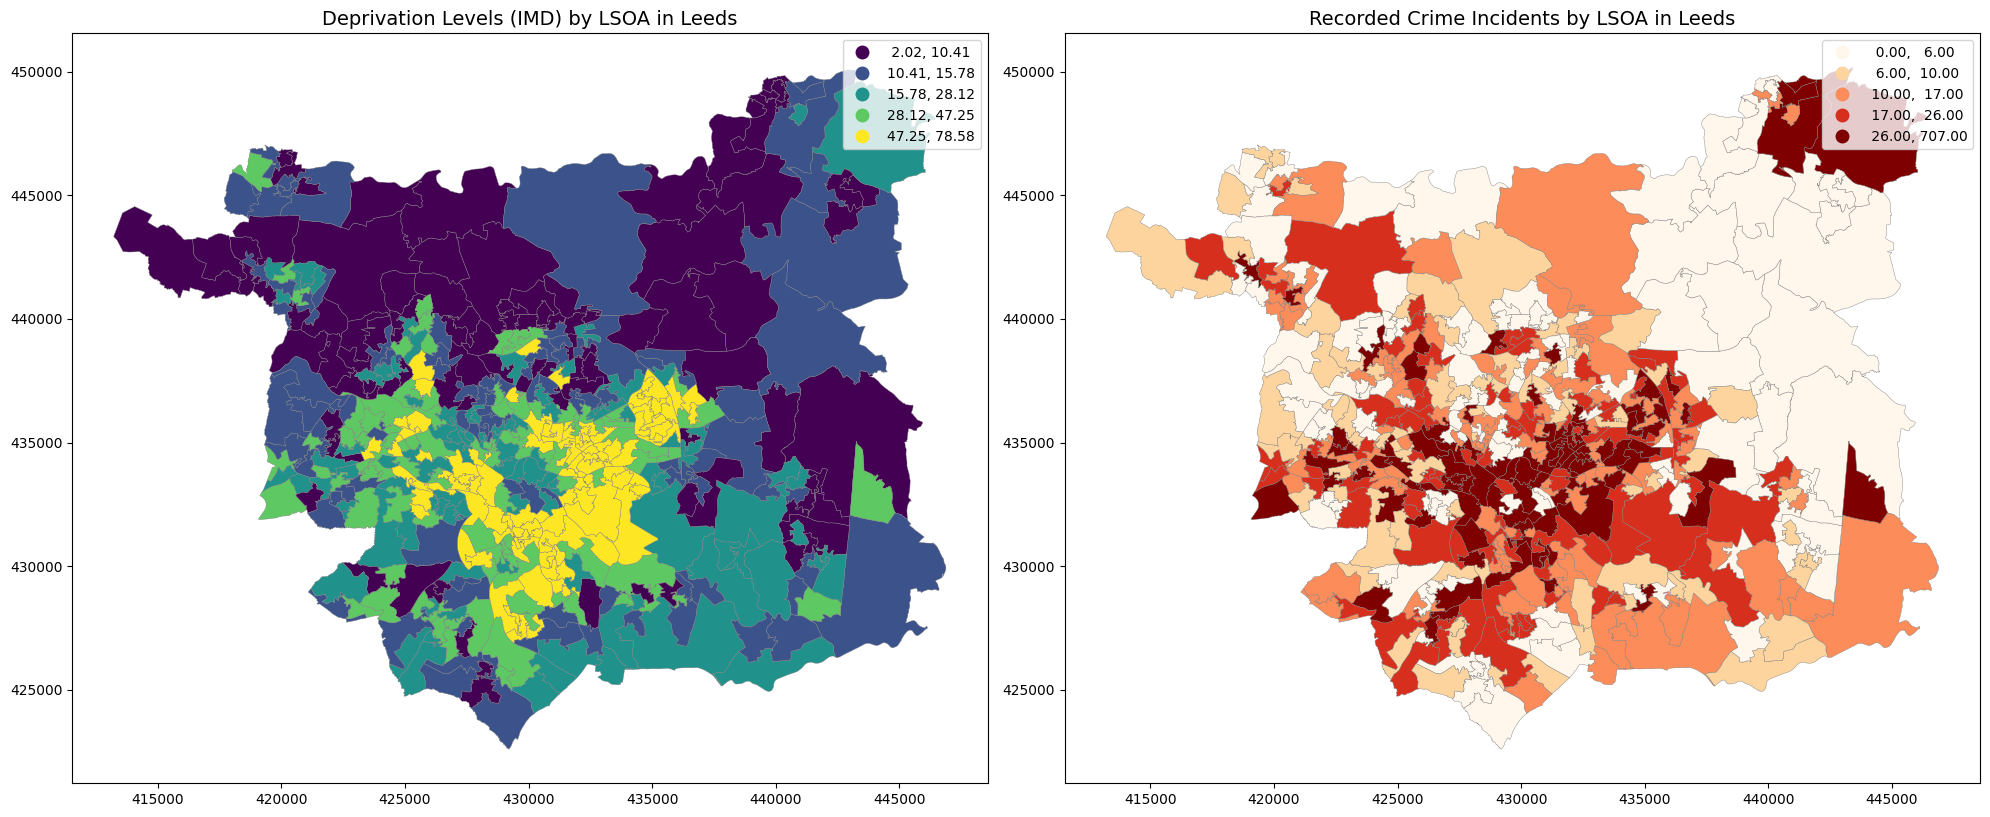

In [23]:
# Install the mapclassify package, which is required for classification-based plotting in GeoPandas
!pip install mapclassify

# Merge LSOA boundary geometries with attribute data (IMD and Crime Count)
# Then rename the IMD column to a shorter name for easier reference in plotting
geo_merged = lsoa.merge(combined, on='LSOA11CD')
geo_merged = geo_merged.rename(columns={
    'Index of Multiple Deprivation (IMD) Score': 'IMD_Score'
})


# Create a figure with two horizontal subplots for side-by-side comparison
# This layout allows to visually compare deprivation and crime distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


# -------------------- Map 1: IMD Choropleth --------------------
# Plot the IMD Score per LSOA using a quantile classification (k=5)
# The 'viridis' colormap is colorblind-friendly and sequential (dark = higher values)
geo_merged.plot(
    column='IMD_Score',
    cmap='viridis',
    scheme='Quantiles',
    k=5,
    linewidth=0.3,
    edgecolor='grey',
    legend=True,
    ax=ax1
)

# Set a map title
ax1.set_title('Deprivation Levels (IMD) by LSOA in Leeds', fontsize=14)
# Show coordinate grid (x, y in projected units such as meters)
ax1.set_axis_on()


# -------------------- Map 2: Crime Choropleth --------------------
# Plot the total recorded crime count per LSOA using the same classification method
# 'OrRd' colormap is a standard choice for crime or intensity maps (light = low, dark = high)
geo_merged.plot(
    column='Crime_Count',
    cmap='OrRd',
    scheme='Quantiles',
    k=5,
    linewidth=0.3,
    edgecolor='grey',
    legend=True,
    ax=ax2
)

# Set map title
ax2.set_title('Recorded Crime Incidents by LSOA in Leeds', fontsize=14)
# Also show coordinate grid for comparison
ax2.set_axis_on()

# Automatically adjust spacing between subplots to prevent overlapping
plt.tight_layout()
# Display the two maps side by side
plt.show()


### Interpretation of Spatial Patterns

The IMD map shows that higher deprivation is concentrated in central and southern Leeds, while peripheral areas tend to be less deprived. The crime map reveals a similar pattern, with high incident counts often occurring in highly deprived urban neighbourhoods.

However, the spatial alignment is not exact. Some deprived areas have moderate crime levels, and some less deprived areas report higher crime. This suggests other factors—such as urban form, policing, population density, or reporting practices—may also shape crime distribution.



## 8. Conclusion

This study identifies a weak but statistically significant link between deprivation and crime in Leeds. Spatial mapping reveals notable neighbourhood disparities, reinforcing the value of visual analysis alongside statistical modelling.

While deprivation alone does not fully explain crime patterns, it remains a relevant factor in urban safety and planning. These findings support the use of data-driven, place-based strategies for targeted intervention.

**References**:  
> - Bannister, J. and Fyfe, N. 2001. Introduction: Fear and the City. Urban studies (Edinburgh, Scotland). 38(5/6), pp.807–813.
> - Chris Brunsdon, L.C. 2018. An Introduction to R for Spatial Analysis and Mapping. SAGE Publications.
> - Goodchild, M. F. 2010. Twenty years of progress: GIScience in 2010. Journal of Spatial Information Science, 1, pp.3–20.  
> - Hadley Wickham 2016. ggplot2 : Elegant Graphics for Data Analysis. Springer International Publishing.
> - Ministry of Housing, Communities & Local Government (2019). English Indices of Deprivation 2019: Technical Report. [Online]. [Accessed 3rd May 2025]. Available from: https://assets.publishing.service.gov.uk/media/5d8b387740f0b609909b5908/IoD2019_Technical_Report.pdf
> - Wheeler, A.P. and Steenbeek, W. 2021. Mapping the Risk Terrain for Crime Using Machine Learning. Journal of quantitative criminology. 37(2), pp.445–480.


### Acknowledgements

I acknowledge the use of ChatGPT-4.0 (OpenAI, https://chat.openai.com/) to assist in identifying appropriate Python libraries for correlation and regression analysis (e.g. `scipy`, `statsmodels`) and for providing a basic example of how to fit a simple linear regression model and calculate Pearson’s correlation coefficient. The final implementation and adaptation were developed independently based on this guidance.